In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from ipywidgets import interact, widgets

In [2]:
def plot_trajectories(filepath):
    # Read the data with proper delimiter and column names
    columns = ['trajectory_number', 'x', 'y', 'z', 'subvol', 'time', 'boxface']
    data = pd.read_csv(filepath, delimiter=",", names=columns)
    
    # Data cleaning: remove commas from numeric columns
    numeric_cols = ['x', 'y', 'z', 'subvol', 'time']
    # data[numeric_cols] = data[numeric_cols].apply(lambda col: col.str.replace(',', '').astype(float))
    
    # Creating a 3D plot to visualize the trajectories in space
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Group data by trajectory number and plot each trajectory
    for name, group in data.groupby('trajectory_number'):
        group = group.sort_values('time')  # Ensure data is sorted by time
        ax.plot(group['x'], group['y'], group['z'], label=f'Trajectory {name}')
    
    # Setting labels and title for the plot
    ax.set_xlabel('Zonal Position (x)')
    ax.set_ylabel('Meridional Position (y)')
    ax.set_zlabel('Vertical Position (z)')

    ax.set_xlim(1, 539)
    ax.set_ylim(1, 269)
    ax.set_zlim(1, 28)

    plt.title('3D Trajectories over Time')
    # plt.legend()
    plt.show()

def plot_trajectory(data, time_point):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Filter and plot data for each trajectory up to the given time point
    for name, group in data.groupby('trajectory_number'):
        # Filter to only include data up to the specified time point
        time_filtered_group = group[group['time'] <= time_point]
        ax.plot(time_filtered_group['x'], time_filtered_group['y'], time_filtered_group['z'], label=f'Trajectory {name}')
    
    ax.set_xlabel('Zonal Position (x)')
    ax.set_ylabel('Meridional Position (y)')
    ax.set_zlabel('Vertical Position (z)')


    plt.title(f'Trajectories up to Time {time_point}')
    plt.legend()
    plt.show()

def interactive_plot(filepath):
    # Read and prepare data
    columns = ['trajectory_number', 'x', 'y', 'z', 'subvol', 'time', 'boxface']
    data = pd.read_csv(filepath, delim_whitespace=True, names=columns)
    numeric_cols = ['x', 'y', 'z', 'subvol', 'time']
    data[numeric_cols] = data[numeric_cols].apply(lambda col: col.str.replace(',', '').astype(float))
    data.sort_values(by=['trajectory_number', 'time'], inplace=True)  # Ensure correct order

    # Create interactive slider
    time_max = data['time'].max()
    interact(lambda time_point: plot_trajectory(data, time_point), 
             time_point=widgets.FloatSlider(value=0, min=0, max=time_max, step=(time_max/100), description="Simulation Time"))


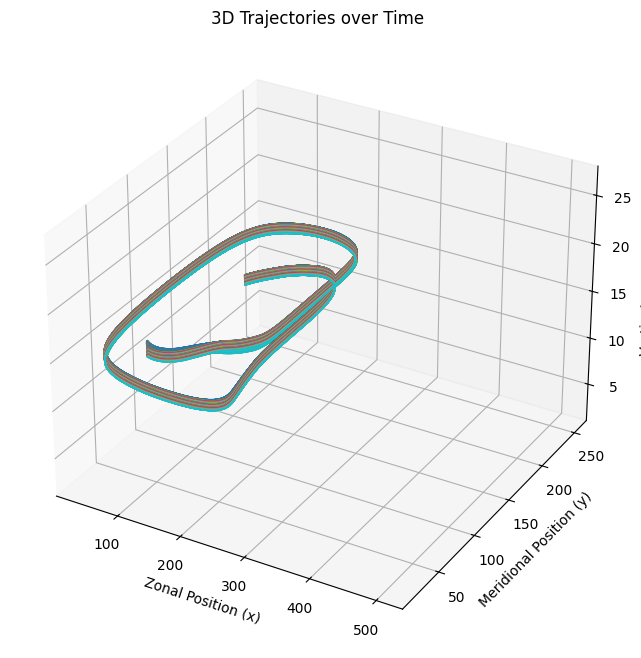

In [3]:
# Replace 'path_to_run_file.txt' with the actual path to your data file
plot_trajectories('TRACMASS_run.csv')

# interactive_plot("TRACMASS_run.csv")
